In [3]:
import pandas as pd
# import re

## Getting familiar with the data

In [18]:
# setting path for seatle data
seatle_data_path = "./seatle-data/"

# reading data
seatle_calendar = pd.read_csv(seatle_data_path + 'calendar.csv')
seatle_reviews = pd.read_csv(seatle_data_path + 'reviews.csv')
seatle_listings = pd.read_csv(seatle_data_path + 'listings.csv')

In [19]:
# setting path for seatle data
boston_data_path = "./boston-data/"

# reading data
boston_calendar = pd.read_csv(boston_data_path + 'calendar.csv')
boston_reviews = pd.read_csv(boston_data_path + 'reviews.csv')
boston_listings = pd.read_csv(boston_data_path + 'listings.csv')

## Calendar dataset

In [20]:
seatle_calendar.sample(10)

,listing_id,date,available,price
239362,9095668,2016-10-17,f,NaN
21437,4566393,2016-09-27,t,$400.00
697142,4121334,2016-12-26,t,$110.00
490765,8608233,2016-07-27,t,$150.00
515395,4264056,2016-01-19,t,$75.00
80519,7651653,2016-08-10,f,NaN
1161473,9332620,2016-02-16,f,NaN
120550,3254956,2016-04-13,t,$129.00
1319806,5927083,2016-11-30,t,$80.00
1090327,7714585,2016-03-16,t,$55.00


In [21]:
seatle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [22]:
boston_calendar.sample(10)

,listing_id,date,available,price
1019967,77691,2017-03-25,t,$65.00
272380,9259184,2017-04-15,t,$749.00
58148,9712731,2016-12-16,f,NaN
102766,12081834,2017-08-12,f,NaN
305087,9166393,2016-10-28,f,NaN
10345,321328,2017-04-17,t,$100.00
902356,2016500,2017-03-14,f,NaN
576263,2634361,2016-10-16,f,NaN
965783,4556374,2016-09-12,t,$60.00
1194091,1887507,2017-03-08,f,NaN


### Observations for data wrangling
* date is a type object -> change to date
* price has the currency $ -> remove $ and change to float
* price has comma delimiter for tousands -> needs removal
* price is set to Null, when not booked (availability f = "free" vs. t = "taken")

In [23]:
seatle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [24]:
seatle_calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [25]:
seatle_calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [26]:
def wrangling_calendar(df):
    ''' cleans the input data
    
    Args: 
            df: Dataframe to be cleaned
        
        Returns: 
            df: cleaned Dataframe
    '''
    # change date as date type
    df['date'] = df['date'].astype('datetime64')
    
    # removes the first character (dollar sign) and comma relimiter for tousands
    df['price']= df['price'].str[1:].str.replace(',', '').astype('float64')
    
    return df

In [27]:
seatle_calendar_clean = wrangling_calendar(seatle_calendar)

In [28]:
seatle_calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [29]:
seatle_calendar_clean.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


In [30]:
seatle_calendar_clean.date.min(), seatle_calendar_clean.date.max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2017-01-02 00:00:00'))

In [31]:
boston_calendar_clean = wrangling_calendar(boston_calendar)

In [37]:
boston_calendar_clean.sample(10)

,listing_id,date,available,price
916684,6716872,2017-01-22,f,NaN
1063577,13574652,2016-10-08,f,NaN
1108033,12593869,2017-06-12,t,31.0
120708,4526315,2017-06-08,f,NaN
1162878,7745117,2016-09-17,f,NaN
700554,11906382,2017-03-15,f,NaN
546487,4377247,2017-04-24,f,NaN
639411,5592866,2016-11-13,f,NaN
521347,9231486,2017-02-16,t,525.0
1073630,11759332,2017-03-11,t,65.0


In [35]:
boston_calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


In [36]:
boston_calendar_clean.describe()

,listing_id,price
count,1.308890e+06,643037.000000
mean,8.442118e+06,198.438909
std,4.500149e+06,180.142913
min,3.353000e+03,11.000000
25%,4.679319e+06,85.000000
50%,8.578710e+06,150.000000
75%,1.279603e+07,255.000000
max,1.493346e+07,7163.000000


In [39]:
boston_calendar_clean.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

## Reviews dataset

### Observations from data exploration
* date is a type object -> change to date
* There are not review rating in this dataset, only comments
* Although a reviewer_name like John is very common, the reviewer_id can differentate each reviewer. Amanda is Top 1 reviewer with 67 reviews for the "Sky cabin", Amanda's favorite place with 11 reviewed visits

In [40]:
seatle_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [44]:
seatle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [45]:
seatle_reviews.reviewer_id.value_counts()

206203      67
15121499    32
2734499     19
5775807     19
29590276    18
            ..
24843087     1
24662663     1
5266145      1
28944689     1
30860360     1
Name: reviewer_id, Length: 75730, dtype: int64

In [46]:
seatle_reviews[seatle_reviews.reviewer_id == 206203]

,listing_id,id,date,reviewer_id,reviewer_name,comments
2981,741699,6902331,2013-08-29,206203,Amanda,I stayed at the Seward Park Zen Retreat as a b...
3006,741699,10781810,2014-03-07,206203,Amanda,Matt's place is a wonderful retreat in an ecle...
3015,741699,11925465,2014-04-19,206203,Amanda,Matt is a friendly host and the Seward Park Ze...
3018,741699,12408205,2014-05-01,206203,Amanda,"The Zen Retreat is quiet, in a great neighborh..."
3063,741699,22453515,2014-11-07,206203,Amanda,The Zen Retreat is a great place to relax and ...
...,...,...,...,...,...,...
74904,10385,89229,2010-09-02,206203,Amanda,Nice accomodations. Great bed! Very nice peo...
76980,2472850,15533376,2014-07-11,206203,Amanda,Teagen is a responsive accommodating host and ...
77987,3293438,34725389,2015-06-11,206203,Amanda,"This is a great place, close to downtown, quie..."
79066,143704,912199,2012-02-10,206203,Amanda,"Julie's guest apartment is cute, clean, comfor..."


In [47]:
seatle_reviews[seatle_reviews.reviewer_id == 206203].listing_id.value_counts()

706385     11
741699      7
63308       7
774659      5
491958      3
20927       3
215882      2
2621746     2
4777832     2
6214517     1
53867       1
794633      1
1204142     1
5580457     1
160222      1
10385       1
2472850     1
3293438     1
143704      1
793629      1
443736      1
1556170     1
619366      1
3627658     1
6776229     1
565703      1
180939      1
392140      1
5060388     1
193836      1
41401       1
666897      1
6475289     1
442487      1
Name: listing_id, dtype: int64

In [57]:
seatle_reviews.query("(reviewer_id == 206203) & (listing_id == 706385)")

,listing_id,id,date,reviewer_id,reviewer_name,comments
37347,706385,5529162,2013-07-04,206203,Amanda,The sky cabin is my new favorite Seattle place...
37365,706385,7987816,2013-10-11,206203,Amanda,Was pleased to find the Sky Cabin available ag...
37377,706385,9309423,2013-12-20,206203,Amanda,"The sky cabin is a real treat; great view, com..."
37382,706385,9789919,2014-01-10,206203,Amanda,I am always happy to see Sky Cabin available f...
37386,706385,9997119,2014-01-24,206203,Amanda,When I make my frequent trips to Seattle I loo...
37390,706385,10219162,2014-02-07,206203,Amanda,Sky Cabin is a welcome retreat for this weary ...
37392,706385,10481855,2014-02-21,206203,Amanda,The Sky Cabin is the best. Treat yourself and ...
37402,706385,11470216,2014-04-04,206203,Amanda,I stay here frequently for my Seattle visits a...
37434,706385,19375983,2014-09-11,206203,Amanda,I am always pleased to find Gillian's Sky Cabi...
37439,706385,21000895,2014-10-09,206203,Amanda,The Sky Cabin is great. I stay there whenever ...


## Listing dataset

### Observations from data exploration
* Most expensive dataset from 3
* details / summary on locations
* review_scores_rating is in percent, rest of scores are from a rating from 1 - 10
* all review scores review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin,  review_scores_communication, review_scores_location and review_scores_value have a 25% percentile of 9 or 10.


In [63]:
seatle_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [62]:
seatle_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [64]:
seatle_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [66]:
seatle_listings.experiences_offered.value_counts()

none    3818
Name: experiences_offered, dtype: int64

In [67]:
seatle_listings.calendar_updated.value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
11 months ago      5
12 months ago      5
22 months ago      2
13 months ago      2
30 months ago      1
14 months ago      1
16 months ago      1
15 months ago      1
17 months ago      1
Name: calendar_updated, dtype: int64

<AxesSubplot:>

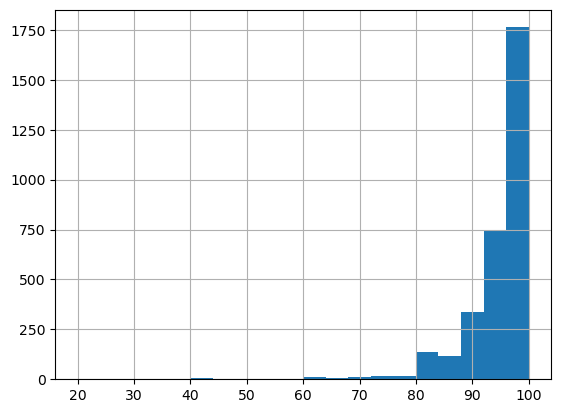

In [70]:
seatle_listings.review_scores_rating.hist(bins=20)

<AxesSubplot:>

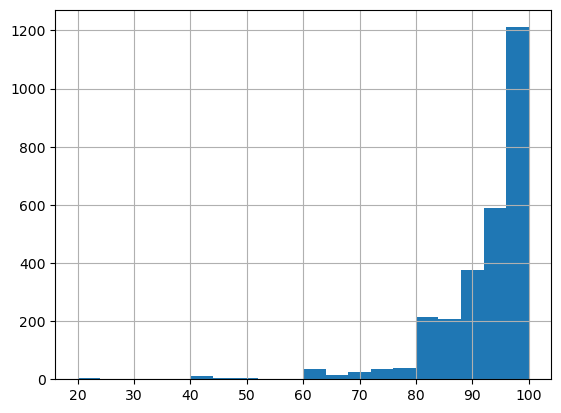

In [71]:
boston_listings.review_scores_rating.hist(bins=20)

## Possible questions
__from calendar__
* does price fluctuate during year?
* Are they differences in the weekdays? price? occupancy?
* How does pricing influence reviews?
* Location
* What mostly mentionned in positive / negative reviews?

__From reviews__
* How long does it take to review a location?
* How many people are leaving reviews -> does the location_id has a influence on it?

__From listings__
* Influence number of previous reviews on bookings
* Influence of response rate
* Influence review scores